<a href="https://colab.research.google.com/github/asrianda/GIS/blob/main/lat4/A6_GIS_GroupBy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import read_file, GeoDataFrame, datasets


<Axes: >

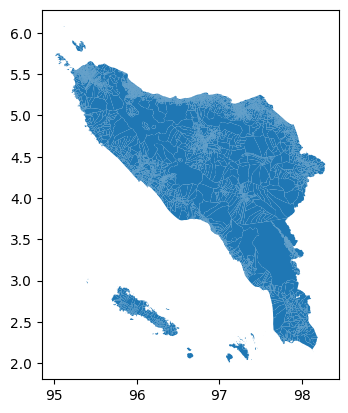

In [2]:
kota=gpd.read_file('acehJson.geojson')
kota.plot()

In [3]:
kota.head()

,OBJECT_ID,KODE_DESA,DESA,KODE,PROVINSI,KAB_KOTA,KECAMATAN,DESA_KELUR,JUMLAH_PEN,JUMLAH_KK,LUAS_WILAY,KEPADATAN,PERPINDAHA,JUMLAH_MEN,PERUBAHAN,WAJIB_KTP,SILAM,KRISTEN,KHATOLIK,HINDU,BUDHA,KONGHUCU,KEPERCAYAA,PRIA,WANITA,BELUM_KAWI,KAWIN,CERAI_HIDU,CERAI_MATI,U0,U5,U10,U15,U20,U25,U30,U35,U40,U45,U50,U55,U60,U65,U70,U75,TIDAK_BELU,BELUM_TAMA,TAMAT_SD,SLTP,SLTA,...,USTADZ,JURU_M,PROMOT,ANGGOTA_,ANGGOTA1,ANGGOTA1_1,PRESIDEN,WAKIL_PRES,ANGGOTA1_2,ANGGOTA1_3,DUTA_B,GUBERNUR,WAKIL_GUBE,BUPATI,WAKIL_BUPA,WALIKOTA,WAKIL_WALI,ANGGOTA1_4,ANGGOTA1_5,DOSEN,GURU,PILOT,PENGACARA_,NOTARIS,ARSITEK,AKUNTA_,KONSUL_,DOKTER,BIDAN,PERAWAT,APOTEK_,PSIKIATER,PENYIA_,PENYIA1,PELAUT,PENELITI,SOPIR,PIALAN,PARANORMAL,PEDAGA_,PERANG_,KEPALA_,BIARAW_,WIRASWAST_,LAINNYA_12,LUAS_DESA,KODE_DES_3,DESA_KEL_1,KODE_12,geometry
0,24.0,1101012001,KEUDE BAKONGAN,110101.0,ACEH,ACEH SELATAN,BAKONGAN,KEUDE BAKONGAN,1330.0,394.0,5.55,240.0,3.0,3.0,1209.0,931.0,1326.0,4.0,0.0,0.0,0.0,0.0,0.0,665.0,665.0,707.0,538.0,9.0,76.0,107.0,126.0,122.0,122.0,98.0,91.0,95.0,122.0,116.0,79.0,77.0,59.0,48.0,30.0,17.0,21.0,249.0,152.0,245.0,167.0,342.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,28.0,0.0,1.0,0.0,95.0,0.0,23.0,1101012001,KEUDE BAKONGAN,110101.0,"MULTIPOLYGON (((97.47670 2.93545, 97.48346 2.9..."
1,26.0,1101012003,UJUNG PADANG,110101.0,ACEH,ACEH SELATAN,BAKONGAN,UJUNG PADANG,640.0,190.0,11.59,55.0,4.0,2.0,570.0,459.0,640.0,0.0,0.0,0.0,0.0,0.0,0.0,323.0,317.0,327.0,266.0,9.0,38.0,48.0,56.0,48.0,73.0,61.0,47.0,54.0,50.0,40.0,45.0,23.0,33.0,23.0,13.0,9.0,17.0,106.0,88.0,246.0,89.0,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,13.0,0.0,25.0,1101012003,UJUNG PADANG,110101.0,"MULTIPOLYGON (((97.47670 2.93545, 97.47282 2.9..."
2,102.0,1101052020,LHOK AMAN,110105.0,ACEH,ACEH SELATAN,MEUKEK,LHOK AMAN,1132.0,342.0,1.80,668.0,0.0,2.0,1048.0,830.0,1132.0,0.0,0.0,0.0,0.0,0.0,0.0,571.0,561.0,574.0,476.0,9.0,73.0,92.0,93.0,95.0,89.0,89.0,91.0,119.0,85.0,87.0,72.0,60.0,41.0,43.0,34.0,20.0,22.0,238.0,119.0,343.0,156.0,200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,17.0,2.0,1.0,0.0,37.0,0.0,101.0,1101052020,LHOK AMAN,110105.0,"MULTIPOLYGON (((97.09457 3.43455, 97.08767 3.4..."
3,33.0,1101022003,PASI KUALA ASAHAN,110102.0,ACEH,ACEH SELATAN,KLUET UTARA,PASI KUALA ASAHAN,743.0,189.0,3.32,224.0,2.0,1.0,631.0,517.0,743.0,0.0,0.0,0.0,0.0,0.0,0.0,398.0,345.0,414.0,298.0,1.0,30.0,62.0,74.0,61.0,86.0,76.0,50.0,67.0,47.0,51.0,38.0,34.0,33.0,20.0,16.0,14.0,14.0,143.0,90.0,264.0,127.0,115.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,8.0,0.0,1.0,0.0,14.0,0.0,32.0,1101022003,PASI KUALA ASAHAN,110102.0,"MULTIPOLYGON (((97.31123 3.11865, 97.31261 3.1..."
4,34.0,1101022004,GUNUNG PULO,110102.0,ACEH,ACEH SELATAN,KLUET UTARA,GUNUNG PULO,756.0,212.0,5.73,132.0,0.0,2.0,665.0,550.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,386.0,370.0,403.0,309.0,2.0,42.0,61.0,60.0,57.0,70.0,65.0,58.0,71.0,69.0,58.0,46.0,38.0,28.0,20.0,20.0,20.0,15.0,125.0,117.0,256.0,115.0,128.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,0.0,0.0,0.0,24.0,0.0,33.0,1101022004,GUNUNG PULO,110102.0,"MULTIPOLYGON (((97.34582 3.13380, 97.34865 3.1..."


In [8]:
kota.shape

(6542, 162)

In [28]:
#data[['time_bucket', 'bitrate']].groupby(['time_bucket'])
#         .agg(['sum', 'count'])
#for i in kota[['KAB_KOTA','JUMLAH_PEN']].values:
data=kota[['KAB_KOTA','JUMLAH_PEN']].groupby(['KAB_KOTA'])['JUMLAH_PEN'].agg(['sum'])



In [29]:
data

,sum
KAB_KOTA,
ACEH BARAT,195634.0
ACEH BARAT DAYA,152280.0
ACEH BESAR,391987.0
ACEH JAYA,90600.0
ACEH SELATAN,236696.0
ACEH SINGKIL,126636.0
ACEH TAMIANG,296088.0
ACEH TENGAH,214997.0
ACEH TENGGARA,225606.0


In [64]:
data1=data.to_dict()
klasifikasi=[]
for i in data1['sum'].values():
  if i>300000:
    klasifikasi.append('Tinggi')
  else:
    klasifikasi.append('Rendah')
klasifikasi

['Rendah',
 'Rendah',
 'Tinggi',
 'Rendah',
 'Rendah',
 'Rendah',
 'Rendah',
 'Rendah',
 'Rendah',
 'Tinggi',
 'Tinggi',
 'Rendah',
 'Tinggi',
 'Rendah',
 'Rendah',
 'Rendah',
 'Rendah',
 'Rendah',
 'Rendah',
 'Rendah',
 'Tinggi',
 'Rendah',
 'Rendah']

In [68]:
gdata=gpd.GeoDataFrame(data1)
gdata

,sum
ACEH BARAT,195634.0
ACEH BARAT DAYA,152280.0
ACEH BESAR,391987.0
ACEH JAYA,90600.0
ACEH SELATAN,236696.0
ACEH SINGKIL,126636.0
ACEH TAMIANG,296088.0
ACEH TENGAH,214997.0
ACEH TENGGARA,225606.0
ACEH TIMUR,422964.0


In [23]:
kota['KAB_KOTA'].unique()

array(['ACEH SELATAN', 'ACEH TENGGARA', 'ACEH TIMUR', 'ACEH TENGAH',
       'ACEH BARAT', 'PIDIE', 'ACEH BESAR', 'ACEH UTARA', 'BIREUEN',
       'SIMEULUE', 'ACEH SINGKIL', 'ACEH JAYA', 'NAGAN RAYA',
       'ACEH BARAT DAYA', 'GAYO LUES', 'PIDIE JAYA', 'ACEH TAMIANG',
       'KOTA LHOKSEUMAWE', 'BENER MERIAH', 'KOTA LANGSA',
       'KOTA BANDA ACEH', 'KOTA SABANG', 'KOTA SUBULUSSALAM', None],
      dtype=object)

<Axes: >

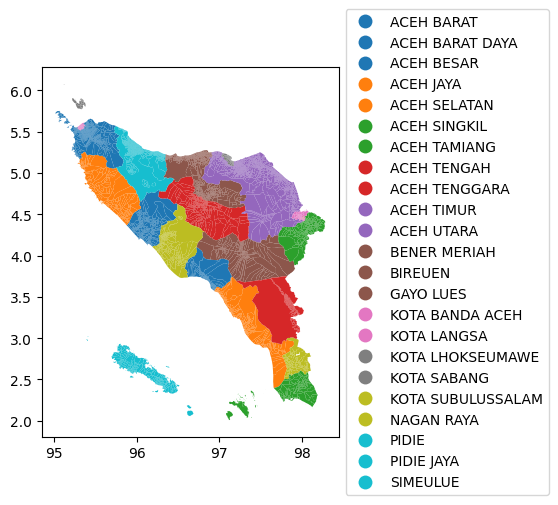

In [7]:
kota.plot(column='KAB_KOTA', legend=True,
          legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)})